<a href="https://colab.research.google.com/github/pbeens/OTF-Data-Analysis-2021-05/blob/main/Demo_Bar_Chart_Mass_of_Planets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mass of Planets - Bar Chart

---

This notebook is based on the template found [here](https://github.com/pbeens/OTF-Data-Analysis-2021-05/blob/main/Data_Analysis_Template.ipynb).


# What is the Objective?

To produce a bar chart of the mass of the planets. Data source: https://en.wikipedia.org/wiki/Planet

# Get the Data

- You need to import the Pandas library.
- You need to define the source file or URL.
- You need to create the dataframe.
- The data can be from within the notebook or from a remote site.
- You may want to include some additional notes here about the data.

In [1]:
import pandas as pd

## From a Website

In [2]:
# enter the URL here
url = 'https://en.wikipedia.org/wiki/Planet'

df_list_of_tables = pd.read_html(url) 
df = df_list_of_tables[8] # enter the index number of the table

# quick look at the data...
df

,Unnamed: 0,Name,Equatorialdiameter[m],Mass[m],Semi-major axis (AU),Orbital period(years),Inclinationto Sun's equator (°),Orbitaleccentricity,Rotation period(days),Confirmedmoons,Axial tilt (°),Rings,Atmosphere
0,1.,Mercury,0.383,0.06,0.39,0.24,3.38,0.206,58.65,0,0.10,no,minimal
1,2.,Venus,0.949,0.81,0.72,0.62,3.86,0.007,−243.02,0,177.30,no,"CO2, N2"
2,3.,Earth(a),1.000,1.00,1.00,1.00,7.25,0.017,1.00,1,23.44,no,"N2, O2, Ar"
3,4.,Mars,0.532,0.11,1.52,1.88,5.65,0.093,1.03,2,25.19,no,"CO2, N2, Ar"
4,5.,Jupiter,11.209,317.83,5.20,11.86,6.09,0.048,0.41,79,3.12,yes,"H2, He"
5,6.,Saturn,9.449,95.16,9.54,29.45,5.51,0.054,0.44,82,26.73,yes,"H2, He"
6,7.,Uranus,4.007,14.54,19.19,84.02,6.48,0.047,−0.72,27,97.86,yes,"H2, He, CH4"
7,8.,Neptune,3.883,17.15,30.07,164.79,6.43,0.009,0.67,14,29.60,yes,"H2, He, CH4"
8,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...


# Quick Look at the Data

Common techniques are to look at the first few rows (head), the columns, and the data types (dtypes).

In [3]:
# The first few records

df.head()

,Unnamed: 0,Name,Equatorialdiameter[m],Mass[m],Semi-major axis (AU),Orbital period(years),Inclinationto Sun's equator (°),Orbitaleccentricity,Rotation period(days),Confirmedmoons,Axial tilt (°),Rings,Atmosphere
0,1.,Mercury,0.383,0.06,0.39,0.24,3.38,0.206,58.65,0,0.10,no,minimal
1,2.,Venus,0.949,0.81,0.72,0.62,3.86,0.007,−243.02,0,177.30,no,"CO2, N2"
2,3.,Earth(a),1.000,1.00,1.00,1.00,7.25,0.017,1.00,1,23.44,no,"N2, O2, Ar"
3,4.,Mars,0.532,0.11,1.52,1.88,5.65,0.093,1.03,2,25.19,no,"CO2, N2, Ar"
4,5.,Jupiter,11.209,317.83,5.20,11.86,6.09,0.048,0.41,79,3.12,yes,"H2, He"


In [4]:
# The names of the columns

df.columns

Index(['Unnamed: 0', 'Name', 'Equatorialdiameter[m]', 'Mass[m]',
       'Semi-major axis (AU)', 'Orbital period(years)',
       'Inclinationto Sun's equator (°)', 'Orbitaleccentricity',
       'Rotation period(days)', 'Confirmedmoons', 'Axial tilt (°)', 'Rings',
       'Atmosphere'],
      dtype='object')

In [5]:
# The datatypes

df.dtypes

Unnamed: 0                         object
Name                               object
Equatorialdiameter[m]              object
Mass[m]                            object
Semi-major axis (AU)               object
Orbital period(years)              object
Inclinationto Sun's equator (°)    object
Orbitaleccentricity                object
Rotation period(days)              object
Confirmedmoons                     object
Axial tilt (°)                     object
Rings                              object
Atmosphere                         object
dtype: object

In [6]:
# A statistical summary

df.describe()

,Unnamed: 0,Name,Equatorialdiameter[m],Mass[m],Semi-major axis (AU),Orbital period(years),Inclinationto Sun's equator (°),Orbitaleccentricity,Rotation period(days),Confirmedmoons,Axial tilt (°),Rings,Atmosphere
count,9,9,9,9,9,9,9,9,9,9,9,9,9
unique,9,9,9,9,9,9,9,9,9,8,9,3,7
top,Color legend: .mw-parser-output .legend{page-b...,Earth(a),0.949,317.83,9.54,0.62,6.09,0.054,−243.02,0,25.19,yes,"H2, He, CH4"
freq,1,1,1,1,1,1,1,1,1,2,1,4,2


In [7]:
# Looking at one column only

df['Mass[m]'] 

0                                                 0.06
1                                                 0.81
2                                                 1.00
3                                                 0.11
4                                               317.83
5                                                95.16
6                                                14.54
7                                                17.15
8    Color legend: .mw-parser-output .legend{page-b...
Name: Mass[m], dtype: object

In [8]:
# Looking at multiple columns

df[['Name', 'Mass[m]']]

,Name,Mass[m]
0,Mercury,0.06
1,Venus,0.81
2,Earth(a),1.00
3,Mars,0.11
4,Jupiter,317.83
5,Saturn,95.16
6,Uranus,14.54
7,Neptune,17.15
8,Color legend: .mw-parser-output .legend{page-b...,Color legend: .mw-parser-output .legend{page-b...


In [9]:
# Want to look at unique values?

df['Rings'].unique() # insert the name of the column! 

array(['no', 'yes',
       'Color legend: .mw-parser-output .legend{page-break-inside:avoid;break-inside:avoid-column}.mw-parser-output .legend-color{display:inline-block;min-width:1.25em;height:1.25em;line-height:1.25;margin:1px 0;text-align:center;border:1px solid black;background-color:transparent;color:black}.mw-parser-output .legend-text{} terrestrial planets gas giants ice giants (both are giant planets). (a) Find absolute values in article Earth'],
      dtype=object)

# Clean/Fix/Filter the Data

This will depend on the data we're looking at. Some issues may be:

- extraneous text in the data
- incorrect data type
- invalid (or no) data

In [10]:
# We need to get rid of the last row

df = df.loc[0:7] # note: loc[] is end-inclusive! (vs Python which is end-exclusive)
df

,Unnamed: 0,Name,Equatorialdiameter[m],Mass[m],Semi-major axis (AU),Orbital period(years),Inclinationto Sun's equator (°),Orbitaleccentricity,Rotation period(days),Confirmedmoons,Axial tilt (°),Rings,Atmosphere
0,1.,Mercury,0.383,0.06,0.39,0.24,3.38,0.206,58.65,0,0.10,no,minimal
1,2.,Venus,0.949,0.81,0.72,0.62,3.86,0.007,−243.02,0,177.30,no,"CO2, N2"
2,3.,Earth(a),1.000,1.00,1.00,1.00,7.25,0.017,1.00,1,23.44,no,"N2, O2, Ar"
3,4.,Mars,0.532,0.11,1.52,1.88,5.65,0.093,1.03,2,25.19,no,"CO2, N2, Ar"
4,5.,Jupiter,11.209,317.83,5.20,11.86,6.09,0.048,0.41,79,3.12,yes,"H2, He"
5,6.,Saturn,9.449,95.16,9.54,29.45,5.51,0.054,0.44,82,26.73,yes,"H2, He"
6,7.,Uranus,4.007,14.54,19.19,84.02,6.48,0.047,−0.72,27,97.86,yes,"H2, He, CH4"
7,8.,Neptune,3.883,17.15,30.07,164.79,6.43,0.009,0.67,14,29.60,yes,"H2, He, CH4"


In [11]:
# Let's rename Earth(a) to Earth

df.loc[2,'Name'] = 'Earth'
df.loc[2]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Unnamed: 0                                 3.
Name                                    Earth
Equatorialdiameter[m]                   1.000
Mass[m]                                  1.00
Semi-major axis (AU)                     1.00
Orbital period(years)                    1.00
Inclinationto Sun's equator (°)          7.25
Orbitaleccentricity                     0.017
Rotation period(days)                    1.00
Confirmedmoons                              1
Axial tilt (°)                          23.44
Rings                                      no
Atmosphere                         N2, O2, Ar
Name: 2, dtype: object

In [12]:
df.head()

,Unnamed: 0,Name,Equatorialdiameter[m],Mass[m],Semi-major axis (AU),Orbital period(years),Inclinationto Sun's equator (°),Orbitaleccentricity,Rotation period(days),Confirmedmoons,Axial tilt (°),Rings,Atmosphere
0,1.,Mercury,0.383,0.06,0.39,0.24,3.38,0.206,58.65,0,0.10,no,minimal
1,2.,Venus,0.949,0.81,0.72,0.62,3.86,0.007,−243.02,0,177.30,no,"CO2, N2"
2,3.,Earth,1.000,1.00,1.00,1.00,7.25,0.017,1.00,1,23.44,no,"N2, O2, Ar"
3,4.,Mars,0.532,0.11,1.52,1.88,5.65,0.093,1.03,2,25.19,no,"CO2, N2, Ar"
4,5.,Jupiter,11.209,317.83,5.20,11.86,6.09,0.048,0.41,79,3.12,yes,"H2, He"


In [13]:
# Convert Mass column to numbers so they can be graphed

df['Mass[m]'] = pd.to_numeric(df['Mass[m]'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df['Mass[m]']

0      0.06
1      0.81
2      1.00
3      0.11
4    317.83
5     95.16
6     14.54
7     17.15
Name: Mass[m], dtype: float64

In [15]:
# Set the Index to the Names of the Planets
# (necessary to label the pie graph properly)

df.index = df.Name

# Plot the Data (Using Pandas Library)

Types of plots:

- ‘bar’ or ‘barh’ for bar plots
- ‘hist’ for histogram
- ‘box’ for boxplot
- ‘kde’ or ‘density’ for density plots
- ‘area’ for area plots
- ‘scatter’ for scatter plots
- ‘hexbin’ for hexagonal bin plots
- ‘pie’ for pie plots

The following code is a good starting point to modify:

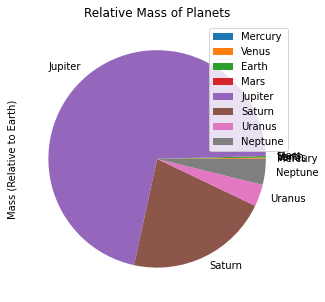

In [16]:
# Plot the data. Be sure to edit all the options!
plot = df.plot(kind='pie', 
          y='Mass[m]', # if plotting more than one column, use a list
          figsize=(10, 5),  # in inches
          ylabel='Mass (Relative to Earth)',
          title='Relative Mass of Planets')

In [17]:
# Want to save the plot?
fig = plot.get_figure()
fig.savefig("mass-of-plants.png")

# Plot the Data (Using matplotlib Library)

In [18]:
import matplotlib.pyplot as plt

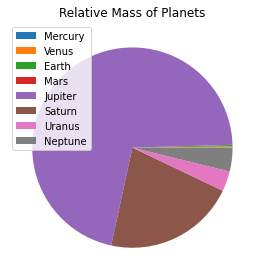

In [19]:
labels = df['Name']

plt.pie(df['Mass[m]'], labels=None)
plt.legend(labels=labels, loc="upper left")
plt.title('Relative Mass of Planets')
plt.tight_layout() # makes it a little larger
plt.savefig("mass-of-plants_2.png")
plt.show()